<h2>Scrape Wiki</h2>

In [35]:
import requests

In [49]:
wiki_link = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
raw_page = requests.get(wiki_link)

In [50]:
page = raw_page.text
page = page.split('\n')

In [51]:
import re
#header
for line in page :
    if "<th>" in line :
        print(line)

<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood


In [117]:
table=[]
#body
for line in page :
    if "<td>" in line :
        line = re.sub('<.+?>','',line, 0).strip()
        table=table+[line]

In [118]:

table2=[[0 for col in range(3)] for row in range(int(len(table)/3))]

i=0
for i in range(len(table)-1):
    table2[int(i/3)][i%3] = table[i]
    i = i+1

In [119]:
import pandas as pd
df=pd.DataFrame(table2)
df.columns =["Postcode", "Borough", "Neighbourhood"]

In [120]:
# remove 'Borough'col is 'Not assigned'
df1= df[df.Borough!='Not assigned']

In [121]:
#remove same code
df2 = df1.drop_duplicates('Postcode')

1. scrape html from url
2. get table html
3. remove tags and save text as array
4. transform array 1d to array 2d
4. transfrom array 2d to dataframe 
5. change coloumn name 
6. remove same code

In [114]:
df2.shape

(103, 3)

In [115]:
import pandas as pd
df3 = pd.read_csv('http://cocl.us/Geospatial_data')
df3.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [124]:
df3.columns =["Postcode",'Latitude','Longitude']
dfD=pd.merge(df2,df3)

In [132]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [133]:
np.random.seed(0)

In [129]:
X= dfD[['Latitude','Longitude']].values
X[0:5]

array([[ 43.7532586, -79.3296565],
       [ 43.7258823, -79.3155716],
       [ 43.6542599, -79.3606359],
       [ 43.718518 , -79.4647633],
       [ 43.6623015, -79.3894938]])

In [134]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [135]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 3, 0, 2, 0, 1, 3, 2, 0, 0, 2, 1, 3, 0, 0, 0, 2, 1, 3, 0, 0, 2,
       3, 0, 0, 0, 3, 2, 2, 0, 0, 0, 3, 2, 2, 0, 0, 0, 3, 2, 2, 0, 0, 0,
       3, 2, 1, 0, 0, 1, 1, 3, 2, 1, 0, 2, 1, 1, 3, 2, 1, 2, 2, 1, 1, 3,
       2, 2, 2, 1, 1, 3, 2, 2, 0, 1, 1, 1, 3, 0, 0, 1, 3, 0, 0, 3, 0, 0,
       1, 1, 3, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 1, 1])

In [137]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.66807421, -79.37315645],
       [ 43.68059059, -79.52478493],
       [ 43.74254792, -79.41366641],
       [ 43.76342274, -79.25682511]])

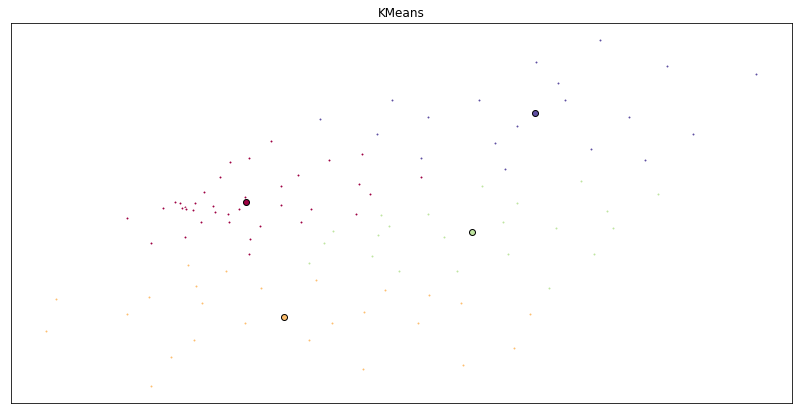

In [138]:
fig = plt.figure(figsize=(14, 7))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

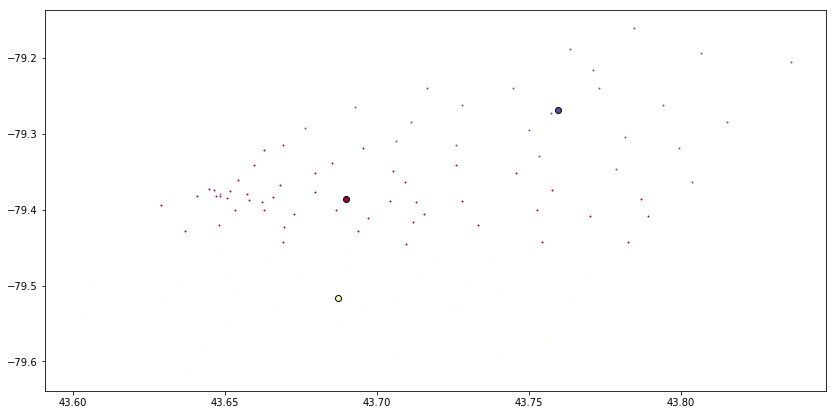

In [140]:
k_means3 = KMeans(init = "k-means++", n_clusters =3, n_init = 12)
k_means3.fit(X)

fig = plt.figure(figsize=(14,7))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means3.labels_))))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [144]:
from sklearn.cluster import DBSCAN 

Make DBSCAN model

In [223]:
epsilon = 0.02
minimumSamples = 3
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels


array([-1, -1,  0, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,
       -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1,
       -1,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1,  1,  3,  0,  1, -1,
       -1,  2,  1,  3, -1, -1, -1, -1,  2, -1,  0,  0, -1, -1, -1,  2,  0,
        0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,
       -1,  0,  0, -1, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  3, -1,
       -1], dtype=int64)

Distinguishing Outliers

In [224]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True, False, False])

In [225]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

In [226]:
unique_labels = set(labels)
unique_labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.97485582, 0.557401  , 0.32272203, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.52733564, 0.8106113 , 0.64521338, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

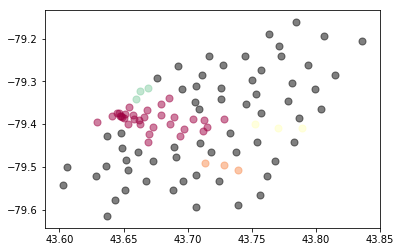

In [227]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)